In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
import h5py

In [ ]:
file = open("./drive/MyDrive/UrbanSound8K/dataset/datasets.pkl", "rb")
dataset = pickle.load(file)

In [ ]:
len(dataset)

5600

In [ ]:
dataset[4001][1]

'siren'

In [ ]:
TRAIN = 4000
VALIDATE = 800
EVALUATE = 800

X_train = []
y_train = []
X_val = []
y_val = []
X_eval = []
y_eval = []

for i in range(4000):
  X_train.append(dataset[i][0])
  y_train.append(dataset[i][1])

for i in range(4000,4800):
  X_val.append(dataset[i][0])
  y_val.append(dataset[i][1])

for i in range(4800, 5600):
  X_eval.append(dataset[i][0])
  y_eval.append(dataset[i][1])

print(len(X_train))
print(len(y_train))

print(len(X_val))
print(len(y_val))

print(len(X_eval))
print(len(y_eval))


4000
4000
800
800
800
800


In [ ]:
y = []
X = []

for i in range(len(dataset)):
  X.append(dataset[i][0])
  y.append(dataset[i][1])

print(len(X))
print(len(y))

5600
5600


In [ ]:
y1 = to_categorical(labelencoder.fit_transform(y))

In [ ]:
y1.shape

(5600, 7)

In [ ]:
print(labelencoder.inverse_transform([0]))

['air_conditioner']


In [ ]:
TRAIN = 4000
VALIDATE = 800
EVALUATE = 800

X_train = []
y_train = []
X_val = []
y_val = []
X_eval = []
y_eval = []

for i in range(4000):
  X_train.append(dataset[i][0])
  y_train.append(y1[i])

for i in range(4000,4800):
  X_val.append(dataset[i][0])
  y_val.append(y1[i])

for i in range(4800, 5600):
  X_eval.append(dataset[i][0])
  y_eval.append(y1[i])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_eval = np.array(X_eval)
y_eval = np.array(y_eval)

print(len(X_train))
print(len(y_train))
print(X_train.shape)
print(y_train.shape)

print(len(X_val))
print(len(y_val))
print(X_val.shape)
print(y_val.shape)

print(len(X_eval))
print(len(y_eval))
print(X_eval.shape)
print(y_eval.shape)

4000
4000
(4000, 173, 13)
(4000, 7)
800
800
(800, 173, 13)
(800, 7)
800
800
(800, 173, 13)
(800, 7)


In [ ]:
X_train[0]

array([[-62.066196 ,  37.59056  , -11.859984 , ..., -12.233681 ,
          9.716293 , -10.255722 ],
       [-15.7480135,  35.986397 , -15.37301  , ..., -10.960424 ,
          0.5235748, -14.83169  ],
       [ -3.7541232,  39.235126 , -11.986609 , ..., -11.518892 ,
          2.9046636, -15.50416  ],
       ...,
       [-66.19696  ,  56.17471  ,  -4.4832335, ..., -13.12426  ,
          2.7222028, -10.341101 ],
       [-38.631977 ,  60.90328  ,  -6.060745 , ...,  -6.7699795,
          3.1986341,  -5.5683365],
       [-47.675056 ,  59.953453 ,  -7.5183353, ...,  -1.6980414,
          6.1224227,  -7.6612854]], dtype=float32)

In [ ]:
myfile = h5py.File("h5dataset.hdf5","w")

myfile.create_dataset("train_set_X", data = X_train)
myfile.create_dataset("train_set_y", data = y_train)
myfile.create_dataset("val_set_X", data = X_val)
myfile.create_dataset("val_set_y", data = y_val)
myfile.create_dataset("eval_set_X", data = X_eval)
myfile.create_dataset("eval_set_y", data = y_eval)

myfile.close()

In [ ]:
print(len(X_train))
print(len(y_train))
print(X_train.shape)
print(y_train.shape)

print(len(X_val))
print(len(y_val))
print(X_val.shape)
print(y_val.shape)

print(len(X_eval))
print(len(y_eval))
print(X_eval.shape)
print(y_eval.shape)


4000
4000
(4000, 173, 13)
(4000, 7)
800
800
(800, 173, 13)
(800, 7)
800
800
(800, 173, 13)
(800, 7)


In [ ]:
X_train_temp = X_train
X_train_temp = X_train_temp[..., np.newaxis]
X_train_temp.shape

(4000, 173, 13, 1)

In [ ]:
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_eval = X_eval[..., np.newaxis]

print(X_train.shape)
print(X_val.shape)
print(X_eval.shape)

(4000, 173, 13, 1)
(800, 173, 13, 1)
(800, 173, 13, 1)


In [ ]:
print(len(X_train))
print(len(y_train))
print(X_train.shape)
print(y_train.shape)

print(len(X_val))
print(len(y_val))
print(X_val.shape)
print(y_val.shape)

print(len(X_eval))
print(len(y_eval))
print(X_eval.shape)
print(y_eval.shape)


4000
4000
(4000, 173, 13, 1)
(4000, 7)
800
800
(800, 173, 13, 1)
(800, 7)
800
800
(800, 173, 13, 1)
(800, 7)


# ***building keras sequential model***

In [ ]:
def soundModel():

  model = tf.keras.Sequential([
                               tf.keras.layers.ZeroPadding2D(padding=3, input_shape = (173,13,1)),
                               tf.keras.layers.Conv2D(64, (11,11), strides=1),
                               tf.keras.layers.BatchNormalization(axis = 3),
                               tf.keras.layers.ReLU(),
                               
                               tf.keras.layers.Conv2D(128, (7,7), strides = 2),
                               tf.keras.layers.BatchNormalization(axis = 3),
                               tf.keras.layers.ReLU(),
                               tf.keras.layers.MaxPooling2D(),

                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(7, activation="softmax")
])
  return model

# ***compile soundModel***

In [ ]:
sound_Model = soundModel()

In [ ]:
sound_Model.compile(optimizer="adam", loss="categorical_crossentropy", metrics = ["accuracy"])

# ***summary of sound_Model***

In [ ]:
sound_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 179, 19, 1)       0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 169, 9, 64)        7808      
                                                                 
 batch_normalization (BatchN  (None, 169, 9, 64)       256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 169, 9, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 2, 128)        401536    
                                                                 
 batch_normalization_1 (Batc  (None, 82, 2, 128)       5

# ***train model***

In [ ]:
history = sound_Model.fit(X_train, y_train, epochs = 40, batch_size = 32, validation_data=(X_eval, y_eval))

Epoch 1/40
125/125 [==============================] - 5s 25ms/step - loss: 1.4045 - accuracy: 0.5288 - val_loss: 3.4568 - val_accuracy: 0.3175
Epoch 2/40
125/125 [==============================] - 3s 22ms/step - loss: 1.0006 - accuracy: 0.6695 - val_loss: 1.7756 - val_accuracy: 0.5150
Epoch 3/40
125/125 [==============================] - 3s 21ms/step - loss: 0.7395 - accuracy: 0.7460 - val_loss: 1.2067 - val_accuracy: 0.6800
Epoch 4/40
125/125 [==============================] - 3s 22ms/step - loss: 0.6239 - accuracy: 0.7920 - val_loss: 0.9497 - val_accuracy: 0.7350
Epoch 5/40
125/125 [==============================] - 3s 22ms/step - loss: 0.5020 - accuracy: 0.8310 - val_loss: 0.5381 - val_accuracy: 0.8313
Epoch 6/40
125/125 [==============================] - 3s 21ms/step - loss: 0.4211 - accuracy: 0.8535 - val_loss: 0.9887 - val_accuracy: 0.7275
Epoch 7/40
125/125 [==============================] - 3s 22ms/step - loss: 0.3840 - accuracy: 0.8658 - val_loss: 0.5734 - val_accuracy: 0.8313

# ***evaluate model***

In [ ]:
sound_Model.evaluate(X_eval,  y_eval)

25/25 [==============================] - 0s 10ms/step - loss: 0.6482 - accuracy: 0.8737


[0.6481748223304749, 0.8737499713897705]

In [ ]:
sound_Model.evaluate(X_val,  y_val)

25/25 [==============================] - 0s 8ms/step - loss: 0.6190 - accuracy: 0.8788


[0.6190035343170166, 0.8787500262260437]

In [ ]:
sound_Model.save("my_sound_model(87_37).h5")

In [ ]:
labelencoder.inverse_transform([0,1,2,3,4,5,6])

array(['air_conditioner', 'children_playing', 'drilling', 'engine_idling',
       'jackhammer', 'siren', 'street_music'], dtype='<U16')

# ***Plotting graphs***

In [ ]:
predictions = sound_Model.predict(X_eval, verbose = 0)

In [ ]:
temp_pred = np.argmax(predictions, axis = -1)
print(len(temp_pred))
print(temp_pred)

800
[1 4 5 4 3 3 2 1 3 2 6 4 2 2 6 6 5 2 0 2 6 1 4 0 2 2 0 4 0 0 0 0 6 5 2 5 4
 2 1 1 0 6 3 3 2 5 4 2 3 4 0 2 4 3 4 0 1 1 3 5 2 3 6 0 6 2 1 3 4 4 1 3 1 3
 5 5 6 5 0 6 6 6 1 4 3 4 0 3 2 3 4 4 6 5 5 4 3 3 5 4 4 5 2 5 6 4 0 5 6 1 1
 5 6 6 3 2 4 5 0 6 4 3 3 5 0 6 4 0 1 5 3 0 6 4 4 4 2 0 0 3 2 4 5 4 6 2 2 6
 0 6 0 3 6 6 2 1 2 6 2 3 2 3 3 1 0 2 3 5 2 0 0 4 4 4 3 6 3 0 2 6 2 1 1 6 3
 2 1 4 1 4 4 0 3 0 0 4 3 5 1 0 4 2 5 1 2 5 1 1 5 0 2 3 5 1 4 6 4 6 5 3 4 2
 5 6 0 5 0 3 3 0 6 2 0 4 0 2 0 1 5 0 4 0 3 3 5 5 5 3 2 1 5 4 3 0 1 6 3 2 1
 4 3 3 5 2 1 5 0 6 3 1 2 6 6 1 0 0 6 1 3 1 5 3 3 4 6 3 2 0 2 4 1 2 0 0 5 1
 5 2 5 5 6 4 1 6 5 0 6 3 2 2 3 0 6 0 6 1 0 3 6 6 5 2 5 4 5 2 4 4 5 2 0 3 2
 2 0 6 5 3 0 3 0 5 1 4 0 1 4 3 5 2 6 4 4 2 3 5 2 1 1 4 1 2 0 3 3 5 0 2 2 0
 6 5 5 5 0 3 5 2 5 1 5 6 0 5 1 3 1 3 6 2 2 2 4 5 0 5 6 3 0 5 6 4 4 6 6 1 0
 0 3 5 2 5 2 3 5 5 5 5 5 2 1 6 3 2 6 5 5 5 1 1 5 0 6 6 2 6 4 0 1 6 1 2 4 6
 2 0 0 5 1 6 5 6 5 5 6 6 6 5 1 0 0 1 4 6 6 0 4 6 3 2 5 0 0 3 2 6 4 6 2 3 2
 4 2 1 1 4 4 5 3 1 6 

In [ ]:
temp_eval_label = np.argmax(y_eval, axis = -1)
print(len(temp_eval_label))
print(temp_eval_label)

800
[1 4 5 4 3 3 2 1 3 2 6 4 2 2 6 6 5 2 0 2 1 1 4 0 2 2 0 4 1 0 0 0 6 5 2 5 6
 2 6 1 0 6 3 3 2 5 4 2 3 4 0 2 4 3 4 0 1 1 3 5 2 3 6 0 6 2 1 3 6 4 1 3 1 3
 5 5 6 6 0 6 4 6 6 4 3 4 0 3 2 3 4 4 6 5 5 2 3 3 5 4 4 2 2 5 1 4 0 5 6 1 1
 5 6 6 3 2 1 2 6 2 4 1 3 5 0 6 4 0 1 5 3 0 2 4 4 4 2 0 0 3 2 4 5 0 6 2 2 6
 0 6 0 3 6 6 2 6 6 6 2 3 2 3 3 1 0 2 3 5 2 0 0 4 4 4 3 1 3 0 2 1 2 1 6 6 3
 2 1 4 1 4 4 0 3 0 0 4 3 5 0 0 4 2 5 1 2 5 1 5 5 0 2 3 5 1 4 6 4 1 5 3 4 2
 5 6 5 5 0 3 3 0 6 2 0 4 0 2 0 1 5 0 4 0 3 3 5 5 5 3 2 1 5 4 1 0 1 6 3 2 0
 4 3 3 5 2 1 5 0 6 3 1 2 6 6 1 0 0 6 1 3 1 6 3 3 1 1 3 2 0 1 2 1 2 0 0 5 0
 5 2 5 5 6 2 1 1 5 0 6 3 1 2 3 0 1 0 6 6 0 3 6 1 5 6 5 4 5 2 4 4 5 2 0 3 2
 2 0 1 5 3 0 3 0 5 1 2 0 1 4 3 5 4 1 6 4 2 3 6 2 1 1 4 6 2 0 3 3 5 0 2 1 0
 6 5 5 5 0 3 5 2 5 1 5 6 0 5 1 3 1 3 6 2 1 2 4 5 6 5 6 3 0 5 6 4 4 6 1 1 0
 0 6 1 2 5 2 3 5 5 5 5 5 2 1 6 3 2 4 5 3 5 1 1 5 0 2 6 2 6 4 0 1 6 1 2 4 6
 2 0 0 5 5 6 5 6 5 1 6 1 6 5 6 0 0 1 4 1 6 0 4 6 3 2 5 0 0 3 2 6 4 6 2 3 2
 4 2 1 1 4 4 5 3 1 6 

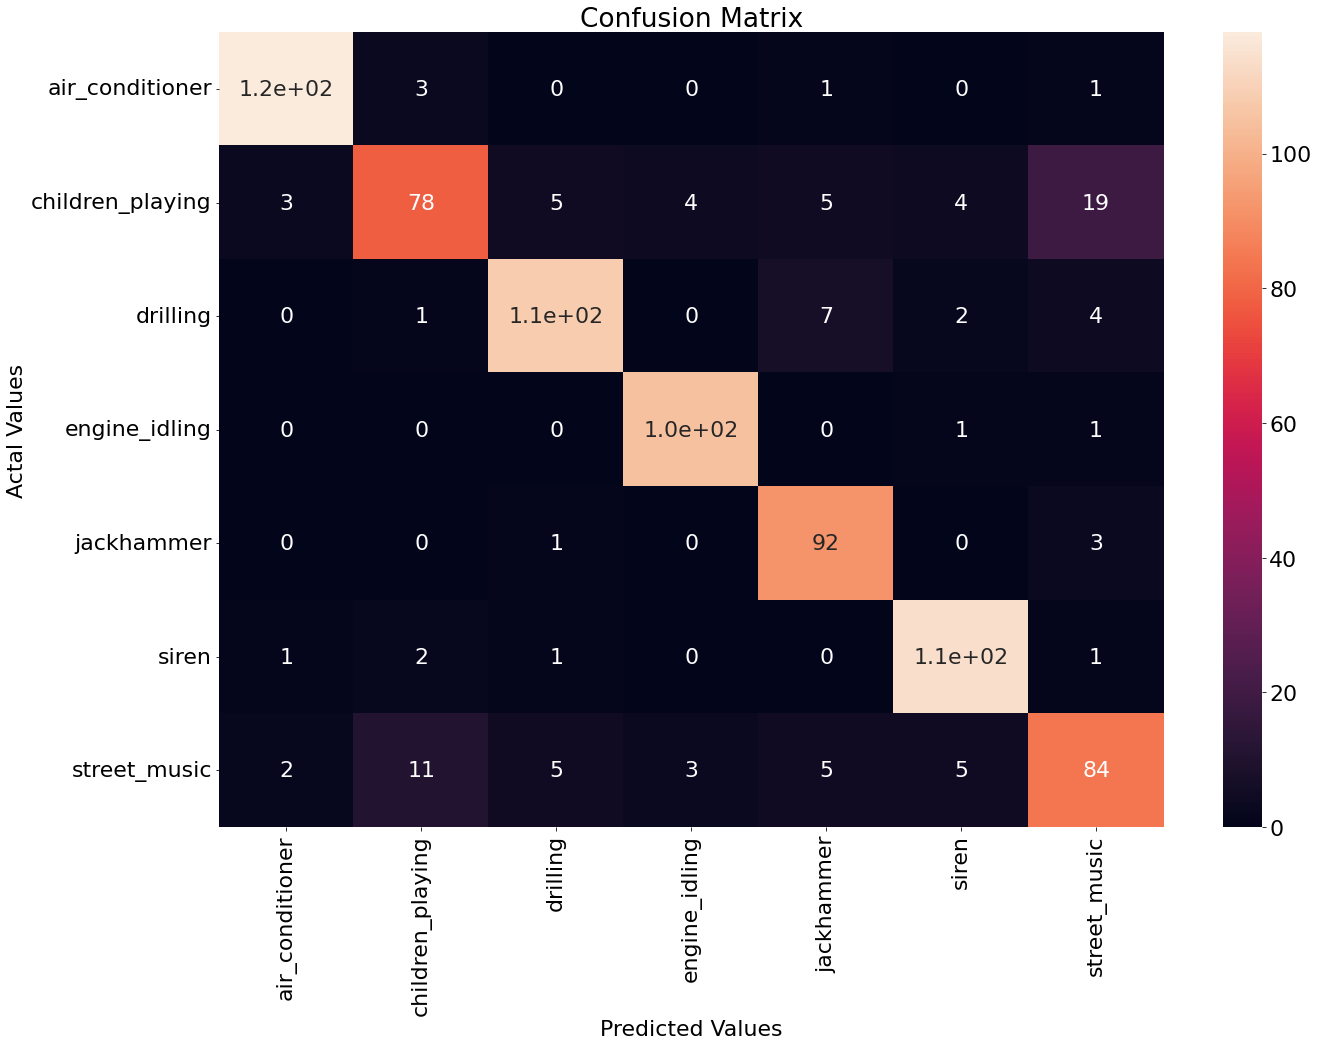

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(temp_eval_label, temp_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['air_conditioner', 'children_playing', 'drilling', 'engine_idling',
       'jackhammer', 'siren', 'street_music'], 
                     columns = ['air_conditioner', 'children_playing', 'drilling', 'engine_idling',
       'jackhammer', 'siren', 'street_music'])

#Plotting the confusion matrix
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,15))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


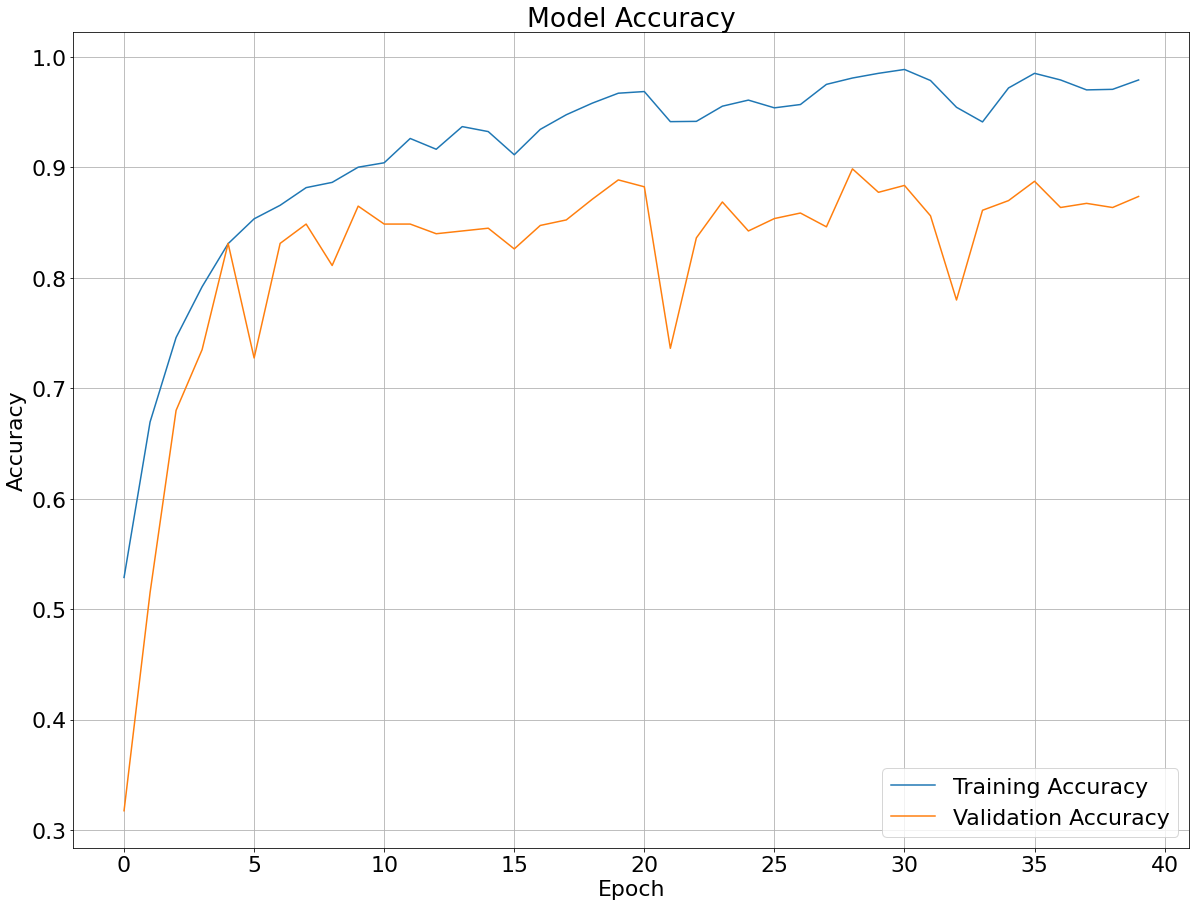

In [ ]:
plt.rcParams.update({'font.size': 22})
print(history.history.keys())
plt.figure(figsize = (20, 15))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.grid()
plt.savefig('train_val_accuracy.png')
plt.show()

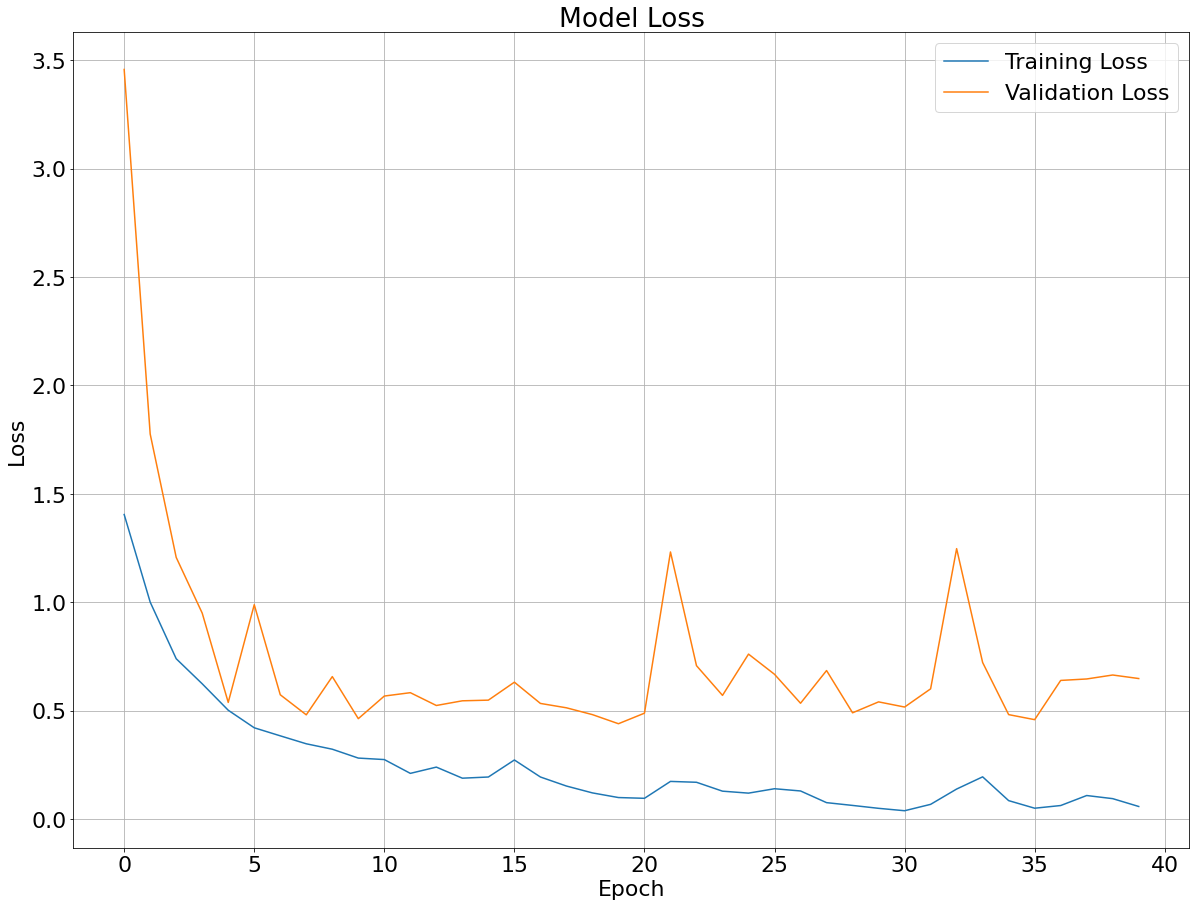

In [ ]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (20, 15))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.grid()
plt.savefig('train_val_loss.png')
plt.show()

# ***testing on custom data***

In [ ]:
import librosa

In [ ]:
signal, sampling_rate = librosa.load("drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-5.wav")
print(sampling_rate)
print(signal.shape)

22050
(88200,)


In [ ]:
from IPython.display import Audio, display

sound_boo = "drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-5.wav"
display(Audio(sound_boo, autoplay=True))

In [ ]:
MFCC = librosa.feature.mfcc(signal, n_mfcc=13, sr=sampling_rate)
print(MFCC.shape)

(13, 173)


In [ ]:
MFCC = MFCC.T
print(MFCC.shape)

(173, 13)


In [ ]:
MFCC = MFCC[..., np.newaxis]
MFCC.shape

(173, 13, 1)

In [ ]:
temp = MFCC
temp = temp.reshape(1, 173, 13, 1)

In [ ]:
temp.shape

(1, 173, 13, 1)

In [ ]:
predict_x=sound_Model.predict(temp) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
classes_x

array([3])

In [ ]:
pred_class = labelencoder.inverse_transform(classes_x)

In [ ]:
pred_class

array(['engine_idling'], dtype='<U16')